In [315]:
!pip install matplotlib
!pip install numpy
!pip install pandas

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('bmh')

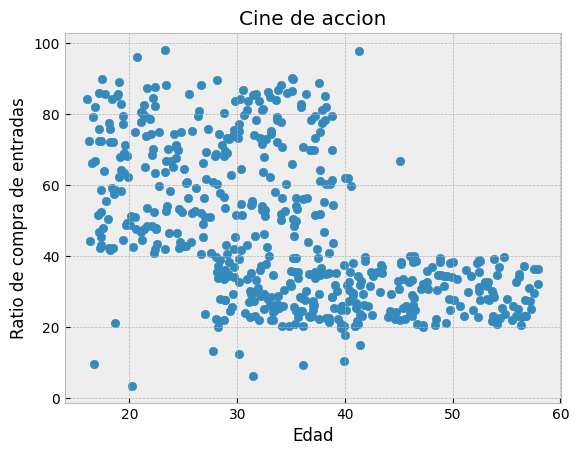

In [3]:
edad=np.block([np.random.rand(250)*23+16,np.random.rand(250)*30+28,np.random.rand(40)*30+16])
R_c=100*np.block([np.random.rand(250)*.5+.4,np.random.rand(250)*.2+.2,np.random.rand(40)])

plt.title('Cine de accion')
plt.xlabel('Edad')
plt.ylabel('Ratio de compra de entradas')
plt.scatter(edad,R_c)


In [22]:
import pandas as pd
df=pd.DataFrame({"Edad":edad,"Ratio":R_c})
df

,Edad,Ratio
0,23.793370,58.305895
1,21.287326,80.003342
2,20.646483,47.666030
3,32.045306,83.644856
4,16.561993,66.168507
...,...,...
535,44.268481,29.316433
536,30.196667,12.302961
537,27.712447,60.686113
538,39.670099,19.719931


In [23]:
valores=np.random.choice(np.arange(len(edad)),4)

In [24]:
centroides=list(zip(edad[valores],R_c[valores]))

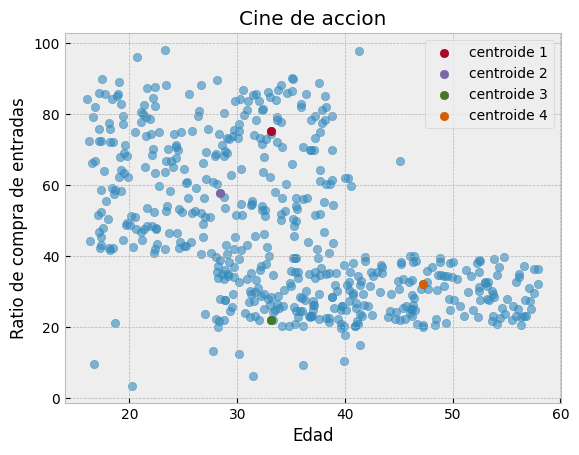

In [25]:
plt.title('Cine de accion')
plt.xlabel('Edad')
plt.ylabel('Ratio de compra de entradas')
plt.scatter(edad,R_c,alpha = .6)
for n,i in enumerate(centroides):
    plt.scatter(i[0],i[1], label=f'centroide {n+1}')
plt.legend()

In [26]:
centroides

[(33.14018621905136, 75.1367458038031),
 (28.36727918182649, 57.71292917378686),
 (33.127231514417744, 21.932623444784877),
 (47.2291938529862, 32.06029790818168)]

In [45]:
Q = df.copy()

In [46]:
s = 0
for i,j in centroides:
    Q[f'D{s}']=pow(pow(df['Edad']-i,2)+pow(df['Ratio']-j,2),1/2)
    s+=1
Q['class'] = None

In [47]:
Q

,Edad,Ratio,D0,D1,D2,D3,class
0,23.793370,58.305895,19.999301,6.740920,33.065601,36.922082,None
1,21.287326,80.003342,6.785186,28.246460,54.638261,56.174033,None
2,20.646483,47.666030,31.066635,7.785414,24.756583,32.518161,None
3,32.045306,83.644856,7.168650,31.748381,56.791122,55.294402,None
4,16.561993,66.168507,16.213915,17.276873,43.019456,47.603942,None
...,...,...,...,...,...,...,...
535,44.268481,29.316433,51.328413,28.828930,10.442724,4.480028,None
536,30.196667,12.302961,65.654455,40.151445,15.104446,26.041602,None
537,27.712447,60.686113,17.225425,8.408552,34.395239,36.352281,None
538,39.670099,19.719931,59.401511,35.014009,9.073570,14.192794,None


In [48]:
print(Q.columns[2:-1])
Q['class']=np.argmin(Q[Q.columns[2:-1]], axis=1)

Index(['D0', 'D1', 'D2', 'D3'], dtype='object')


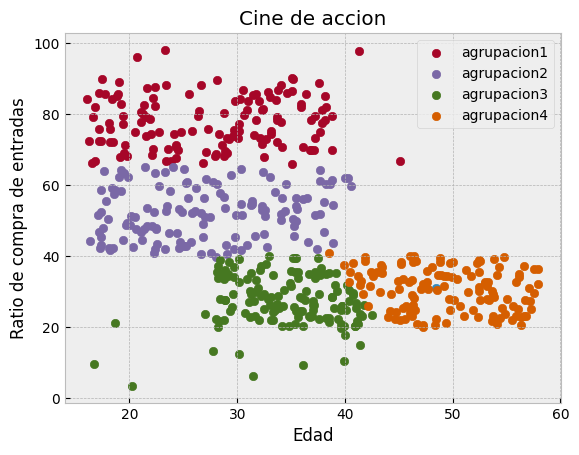

In [49]:
plt.title('Cine de accion')
plt.xlabel('Edad')
plt.ylabel('Ratio de compra de entradas')
plt.scatter(centroides[-1][0],centroides[-1][1])
for i in range(len(centroides)):
    plt.scatter(Q[Q['class']==i]['Edad'],Q[Q['class']==i]['Ratio'], label = f'agrupacion{i+1}')
plt.legend()

In [43]:
for i in range(len(centroides)):
    edad_, ratio_ = Q[Q['class']==i].mean()[['Edad','Ratio']]
    centroides[i] = edad_,ratio_

In [44]:
centroides

[(27.74201332809757, 77.91151300688317),
 (26.88926188395379, 52.31795263508102),
 (34.11125051211202, 26.89132369772573),
 (48.47830452011891, 30.848762772901658)]

# Con Sklearn

In [9]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 14.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 1.6 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 7.0 MB/s eta 0:00:000m eta 0:00:010:01:01


In [52]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array(df)
kmeans = KMeans(n_clusters=4, random_state=1, n_init="auto").fit(X)

In [53]:
kmeans.cluster_centers_

array([[27.18016229, 51.69720175],
       [27.60632247, 77.53991468],
       [34.95906859, 27.67924632],
       [50.05245029, 30.22455606]])

In [54]:
Y=kmeans.predict(X)

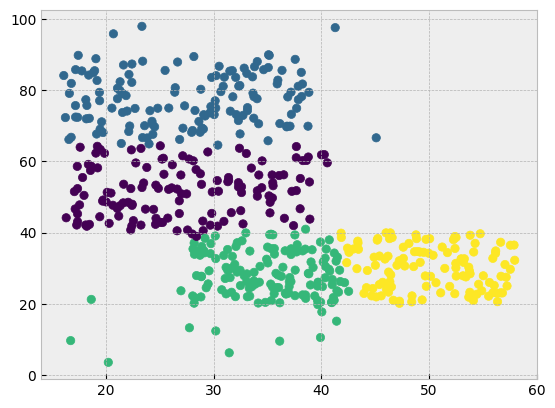

In [55]:
plt.scatter(df['Edad'],df['Ratio'],c=Y)